In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast  
import seaborn as sns

In [2]:
df = pd.read_csv(r'D:\Python\Python course\data_jobs.csv')
dfvg = pd.read_csv(r'D:\Python\Alex\Files\vgsales.csv')

new_columns = ['job', 'fname', 'location', 'via', 'schedule', 'remote','search_location','posted_dt','no_degree','health_ins','country','salrate','salyr','salhr','company','skills','skilltype']
df.columns = new_columns

# data clean up
df['posted_dt'] = pd.to_datetime(df['posted_dt'])                                                                # converting the column from string format to date time format
df['skills'] = df['skills'].apply(lambda gg: ast.literal_eval(gg) if pd.notna(gg) else gg)                       # converts job_skills from sting to list
#df.dropna(subset=['salyr'],inplace=True)

##### prob 5

###### <pre> get 3 sub plots for top 3 jobs with their respective skills in 1 fig

###### solution

In [3]:
df_5 = df.copy()
df_5 = df_5.explode('skills')
df_5 = df_5.groupby(['job','skills']).size()
df_5 = df_5.reset_index(name='skill count')
df_5 = df_5.sort_values(by='skill count',ascending=False)

df_5

,job,skills,skill count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


In [4]:
titles = df_5['job'].unique().tolist()
titles = titles[:3]
titles

['Data Scientist', 'Data Engineer', 'Data Analyst']

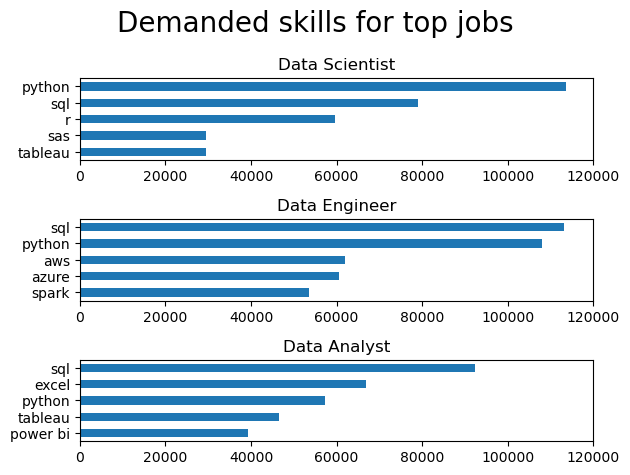

In [5]:
fig,ax = plt.subplots(len(titles),1)

for i,job_title in enumerate(titles):
    df_5[df_5['job']== job_title].head(5).plot(kind='barh', x = 'skills',y = 'skill count',ax = ax[i], title = job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].set_xlim(0, 120000)  
    ax[i].get_legend().remove()

fig.suptitle('Demanded skills for top jobs', fontsize = 20)
plt.tight_layout()